In [23]:
from extractor.crohme_parser.inkml import *
import numpy as np
import matplotlib.patches as patches

In [3]:
ink = Ink("/home/lap13631/PycharmProjects/master-thesis/hmer/data/CROHME_full_v2/CROHME2013_data/TrainINKML/expressmatch/65_alfonso.inkml")

In [5]:
            for group in self._trace_groups:
                for trace in group.traces:
                    data = np.array(trace.coords)
                    x, y = zip(*data)
                    plt.plot(x, y, linewidth=linewidth, c='black')

<bound method Ink.draw of <extractor.crohme_parser.inkml.Ink object at 0x7f1ce8ca8710>>

In [6]:
trace_groups = ink.trace_groups

In [19]:
bbox = [trace.bbox for trace in trace_groups]

In [20]:
bbox

[[[3950000, 1220000], [4480000, 1590000]],
 [[4800000, 1320000], [5220000, 1490000]],
 [[5520000, 1240000], [5890000, 1600000]],
 [[7280000, 1070000], [7640000, 1530000]],
 [[6250000, 1270000], [7080000, 1510000]]]

In [28]:
bbox[0][0][0]

3950000

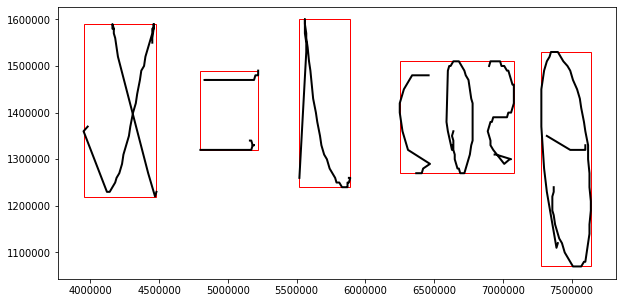

In [35]:
# plt.figure(figsize=(10,5))
fig,ax = plt.subplots(1, figsize=(10,5))
for group in trace_groups:
    for trace in group.traces:
        data = np.array(trace.coords)
        x, y = zip(*data)
        plt.plot(x, y, linewidth=2, c='black')
    bbx = group.bbox
    rect = patches.Rectangle((bbx[0]),bbx[1][0]-bbx[0][0],bbx[1][1]-bbx[0][1],linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
plt.show()
# rect = [patches.Rectangle((bbx[0]),bbx[1][0]-bbx[0][0],bbx[1][1]-bbx[0][1],linewidth=1,edgecolor='r',facecolor='none') for bbx in bbox]
# plt.savefig('tmp' + '.png', bbox_inches='tight', dpi=100)
# plt.gcf().clear()

In [18]:
trace_groups[0].traces[0].coords

[[3980000, 1370000],
 [3950000, 1360000],
 [4120000, 1230000],
 [4140000, 1230000],
 [4160000, 1240000],
 [4180000, 1250000],
 [4190000, 1260000],
 [4210000, 1270000],
 [4230000, 1290000],
 [4240000, 1310000],
 [4260000, 1330000],
 [4280000, 1350000],
 [4290000, 1370000],
 [4310000, 1400000],
 [4330000, 1420000],
 [4340000, 1440000],
 [4360000, 1470000],
 [4370000, 1490000],
 [4390000, 1500000],
 [4400000, 1520000],
 [4420000, 1540000],
 [4430000, 1550000],
 [4440000, 1560000],
 [4450000, 1570000],
 [4450000, 1580000],
 [4460000, 1580000],
 [4460000, 1590000],
 [4460000, 1580000],
 [4450000, 1560000],
 [4450000, 1550000]]

In [63]:
#phai scale ve size tuong thich roi moi ve duoc
def draw_pattern(group, box_size):# ve tung group

        pattern_drawn = np.zeros(shape=(box_size, box_size), dtype=np.float32)
        for trace in group.traces:
            data = np.array(trace.coords)
    
            ' SINGLE POINT TO DRAW '
            if len(data) == 1:
                x_coord = data[0][0]
                y_coord = data[0][1]
                pattern_drawn[y_coord, x_coord] = 0.0

            else:
                ' TRACE HAS MORE THAN 1 POINT '

                'Iterate through list of traces endpoints'
                for pt_idx in range(len(data) - 1):

                    'Indices of pixels that belong to the line. May be used to directly index into an array'
                    # pattern_drawn[line(r0=trace[pt_idx][1], c0=trace[pt_idx][0],
                    #                  r1=trace[pt_idx + 1][1], c1=trace[pt_idx + 1][0])] = 0.0
                    img = Image.fromarray(pattern_drawn)
                    draw = ImageDraw.Draw(img)
                    draw.line([(data[pt_idx][0], data[pt_idx][1]), (data[pt_idx + 1][0], data[pt_idx + 1][1])], fill=1, width=3)

                    pattern_drawn = np.array(img)

        return pattern_drawn

In [64]:
tmp_pattern = draw_pattern(trace_groups[0], 300)

In [58]:
np.sum(tmp_pattern)

0.0

In [ ]:
def shift_trace_grp(self, group, min_x, min_y):

        shifted_trace_grp = []

        for trace in group:
            shifted_trace = [[coord[0] - min_x, coord[1] - min_y] for coord in trace]

            shifted_trace_grp.append(shifted_trace)

        return shifted_trace_grp